In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [421]:
heroes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [422]:
heroes_df.drop(columns='Unnamed: 0',inplace=True)

In [423]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [424]:
heroes_df.shape[0]

734

In [425]:
heroes_df.shape[1]

10

In [426]:
heroes_df.shape

(734, 10)

In [427]:
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [428]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [429]:
powers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/super_hero_powers.csv')

In [430]:
powers_df.shape

(667, 168)

In [431]:
powers_df.shape[1]

168

In [432]:
powers_df.shape[0]

667

In [433]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [434]:
assert powers_df.columns[-1] == 'Omniscient'

In [435]:
#assert powers_df.columns[0] == 'Agility'

In [436]:
# column Publisher is missing data points in df.

pub_sample1 = heroes_df[heroes_df['Publisher'].notna()].sample(5,random_state=1)

In [437]:
pub_sample1

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [438]:
# Get a sample of the missing values
pub_sample2 = heroes_df[heroes_df['Publisher'].isna()].sample(5,random_state=1)
pub_sample2

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


In [439]:
# Number of missing values in a column
heroes_df['Publisher'].isna().sum()

15

In [440]:
# Number of missing values in all the columns of the dataframe
heroes_df.isna().sum()

,0
name,0
Gender,0
Eye color,0
Race,0
Hair color,0
Height,0
Publisher,15
Skin color,0
Alignment,0
Weight,2


In [441]:
# Number of missing values in all
heroes_df.isna().sum().sum()

17

In [442]:
# Number of duplicate rows in the dataframe
len(heroes_df)-len(heroes_df.drop_duplicates())

1

In [443]:
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [444]:
# Get the duplicate entry in the dataframe
dupli_df = heroes_df.groupby(heroes_df.columns.tolist(),as_index=False).size()
dupli_df[dupli_df['size']>1]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,size
282,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0,2


What is the distribution of superheroes by publisher?

In [445]:
# Number of Distinct categories in a column
heroes_df['Publisher'].value_counts()

,count
Publisher,
Marvel Comics,388
DC Comics,215
NBC - Heroes,19
Dark Horse Comics,18
George Lucas,14
Image Comics,14
Star Trek,6
HarperCollins,6
SyFy,5


In [446]:
# As an exercise in imputation or replace - we will replace "Team Epic TV" to "Epic TV"

heroes_df["Publisher"] = heroes_df["Publisher"].replace("Team Epic TV", "Epic TV")


In [447]:
heroes_df["Publisher"].value_counts()

,count
Publisher,
Marvel Comics,388
DC Comics,215
NBC - Heroes,19
Dark Horse Comics,18
George Lucas,14
Image Comics,14
Star Trek,6
HarperCollins,6
SyFy,5


In [448]:
heroes_df[heroes_df.isna().any(axis=1)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [449]:
# Dropping the rows which have null values in Publisher column

heroes_with_no_publisher = heroes_df[heroes_df['Publisher'].isna()] # Will give only those rows with null values in Publisher column
heroes_df.drop(heroes_with_no_publisher.index, inplace=True) # made the rows which have no Publisher data into an index and dropped those rows in place.
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        719 non-null    object 
 1   Gender      719 non-null    object 
 2   Eye color   719 non-null    object 
 3   Race        719 non-null    object 
 4   Hair color  719 non-null    object 
 5   Height      719 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  719 non-null    object 
 8   Alignment   719 non-null    object 
 9   Weight      719 non-null    float64
dtypes: float64(2), object(8)
memory usage: 61.8+ KB


In [450]:
heroes_df[heroes_df['Skin color'] != '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
34,Apocalypse,Male,red,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0
39,Archangel,Male,blue,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0
...,...,...,...,...,...,...,...,...,...,...
679,Triton,Male,green,Inhuman,No Hair,188.0,Marvel Comics,green,good,86.0
682,Ultron,Male,red,Android,-,206.0,Marvel Comics,silver,bad,331.0
699,Vision,Male,gold,Android,No Hair,191.0,Marvel Comics,red,good,135.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0


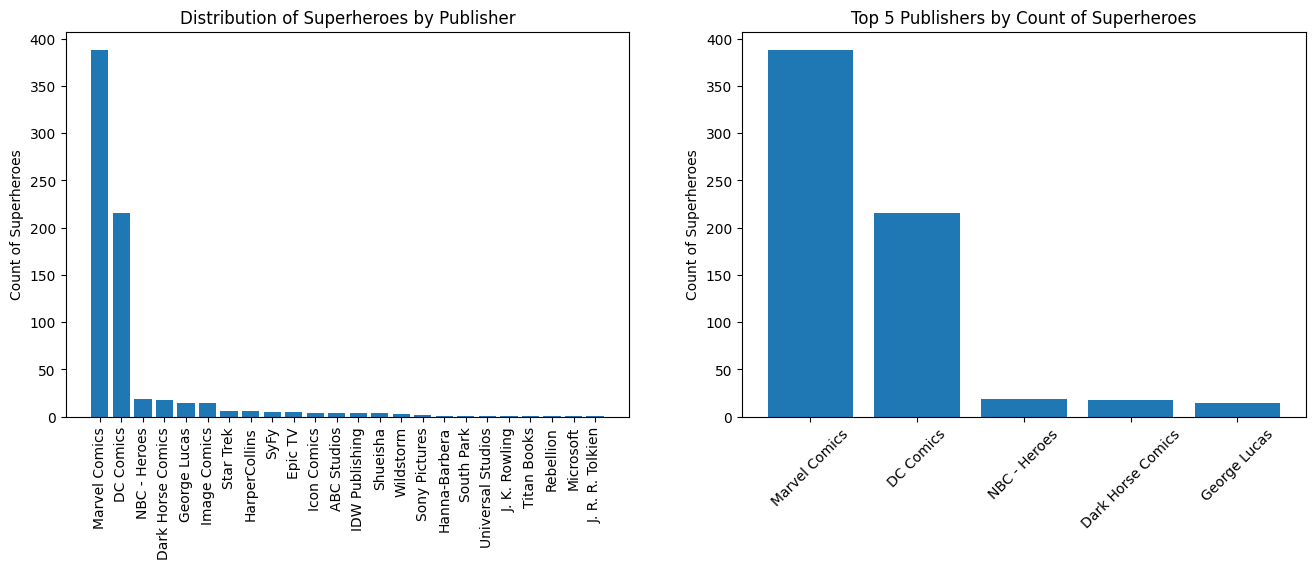

In [451]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

What is the relationship between height and number of superpowers? And does this differ based on gender?

In [452]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [453]:
powers_df.isna().sum()

,0
hero_names,0
Agility,0
Accelerated Healing,0
Lantern Power Ring,0
Dimensional Awareness,0
...,...
Phoenix Force,0
Molecular Dissipation,0
Vision - Cryo,0
Omnipresent,0


In [454]:
# Since we are merging the two dataframes on the name column we want both the dataframe name column should be same.
powers_df.rename(columns={"hero_names": "name"}, inplace=True)

In [455]:
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [456]:
# Merging two dataframes together.
heroes_and_powers_df = pd.merge(heroes_df, powers_df, on="name")


In [457]:
heroes_and_powers_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [458]:
type(heroes_and_powers_df) == pd.DataFrame

True

In [459]:
# To obtain the total number of powers a superhero has
heroes_and_powers_df["Power Count"] = powers_df.iloc[:, 1:].sum(axis=1)
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,4
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,7
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,16
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,1
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,8
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,4
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,18
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,9


<Axes: xlabel='Height', ylabel='Power Count'>

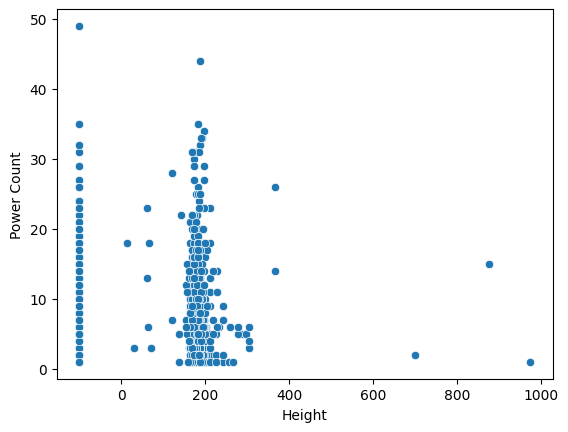

In [460]:
# Plotting height of superhero vs Power Count

sns.scatterplot(heroes_and_powers_df, x='Height', y='Power Count')

In [461]:
# We notice that there are heights which are negative in nature.
heroes_and_powers_df[heroes_and_powers_df['Height'] < 0].sample(5,random_state=101)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
446,Ozymandias,Male,blue,Human,Blond,-99.0,DC Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,8
629,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1
143,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,8
333,Kid Flash,Male,green,Human,Red,-99.0,DC Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,10
410,Monica Dawson,Female,-,-,-,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1


In [462]:
negative_height = heroes_and_powers_df[heroes_and_powers_df['Height'] < 0]['Height']

In [463]:
negative_height.value_counts()

,count
Height,
-99.0,163


In [464]:
negative_weight = heroes_and_powers_df[heroes_and_powers_df['Weight'] < 0]['Weight']

In [465]:
negative_weight.value_counts()

,count
Weight,
-99.0,180


In [466]:
temp_df = heroes_and_powers_df[heroes_and_powers_df['Height'] != -99.0].copy()


In [467]:
assert temp_df[temp_df['Height'] == -99.0].shape[0] == 0

Text(0, 0.5, 'Power Count in numbers')

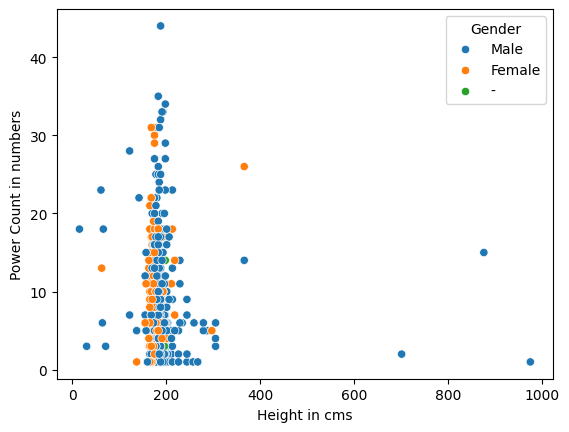

In [468]:
ax = sns.scatterplot(data=temp_df, x='Height', y='Power Count', hue='Gender')
ax.set_xlabel('Height in cms')
ax.set_ylabel('Power Count in numbers')
# We notice that there is no relationship between height and power count.

In [469]:
# What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

# This will select only those rows where the Puiblishers are Marvel Comics or DC Comics
temp_df3 = heroes_and_powers_df.copy()
temp_df3 = temp_df3[(temp_df3['Publisher'] == "Marvel Comics") | (temp_df['Publisher'] == "DC Comics")]

# Now we only need specific columns which is Publishers and Powers
cols = list(powers_df.iloc[:,1:])
cols.append('Publisher')
temp_df3 = temp_df3[cols]
temp_df3.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Publisher
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,DC Comics
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
5,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics


In [470]:
publisher_power_count = temp_df3.groupby("Publisher").sum()
publisher_power_count.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Publisher,,,,,,,,,,,,,,,,,,,,,
DC Comics,58,37,8,4,11,58,37,20,61,3,...,0,1,0,0,1,0,0,1,0,0
Marvel Comics,126,100,0,16,25,154,47,43,111,20,...,16,8,2,8,0,1,0,0,1,1


In [471]:
publisher_power_count = publisher_power_count.T
publisher_power_count.index.name="Superpower Name"
publisher_power_count.reset_index(inplace=True)

In [472]:
publisher_power_count

Publisher,Superpower Name,DC Comics,Marvel Comics
0,Agility,58,126
1,Accelerated Healing,37,100
2,Lantern Power Ring,8,0
3,Dimensional Awareness,4,16
4,Cold Resistance,11,25
...,...,...,...
162,Phoenix Force,0,1
163,Molecular Dissipation,0,0
164,Vision - Cryo,1,0
165,Omnipresent,0,1


In [473]:
publisher_power_count.columns.name = None
publisher_power_count

,Superpower Name,DC Comics,Marvel Comics
0,Agility,58,126
1,Accelerated Healing,37,100
2,Lantern Power Ring,8,0
3,Dimensional Awareness,4,16
4,Cold Resistance,11,25
...,...,...,...
162,Phoenix Force,0,1
163,Molecular Dissipation,0,0
164,Vision - Cryo,1,0
165,Omnipresent,0,1


In [474]:
publisher_power_count.sort_values(['DC Comics', 'Marvel Comics'], ascending=[False, False])

,Superpower Name,DC Comics,Marvel Comics
17,Super Strength,77,204
25,Stamina,68,150
30,Super Speed,61,137
8,Flight,61,111
5,Durability,58,154
...,...,...,...
120,Spatial Awareness,0,0
137,Intuitive aptitude,0,0
139,Melting,0,0
147,The Force,0,0


In [475]:
dc_most_common = publisher_power_count.drop('Marvel Comics', axis=1)
dc_most_common = dc_most_common.sort_values(by='DC Comics',ascending=False)[:5]
dc_most_common


,Superpower Name,DC Comics
17,Super Strength,77
25,Stamina,68
30,Super Speed,61
8,Flight,61
0,Agility,58


In [476]:
marvel_most_common = publisher_power_count.drop('DC Comics', axis=1)
marvel_most_common = marvel_most_common.sort_values(by='Marvel Comics', ascending=False)[:5]
marvel_most_common

,Superpower Name,Marvel Comics
17,Super Strength,204
5,Durability,154
25,Stamina,150
30,Super Speed,137
0,Agility,126


Text(0.5, 1.0, 'Top 5 DC Comics Superhero Powers')

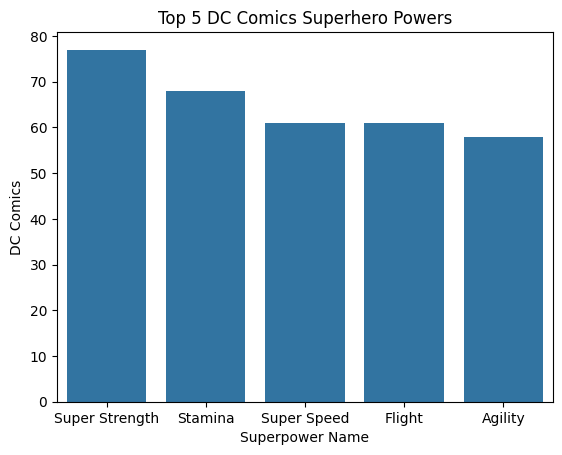

In [477]:
ax = sns.barplot(dc_most_common, x='Superpower Name', y='DC Comics')
ax.set_xlabel('Superpower Name')
ax.set_ylabel('DC Comics')
ax.set_title('Top 5 DC Comics Superhero Powers')

Text(0.5, 1.0, 'Top 5 Marvel Comics Superhero powers')

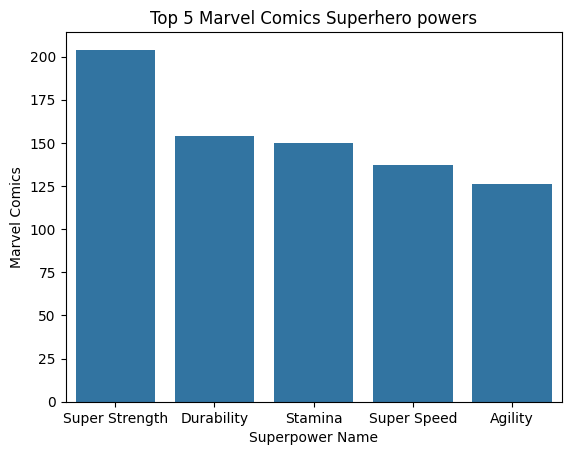

In [478]:
ax = sns.barplot(marvel_most_common, x='Superpower Name', y='Marvel Comics')
ax.set_xlabel('Superpower Name')
ax.set_ylabel('Marvel Comics')
ax.set_title('Top 5 Marvel Comics Superhero powers')

In [480]:
# Which powers have the highest chance of co-occurring in a hero (e.g. super
# strength and flight)?

hero_power_corr = temp_df3.drop('Publisher', axis=1)

In [481]:
corr_matrix = hero_power_corr.corr()

                        Agility  Accelerated Healing  Lantern Power Ring  \
Agility                1.000000             0.281213           -0.001803   
Accelerated Healing    0.281213             1.000000           -0.045863   
Lantern Power Ring    -0.001803            -0.045863            1.000000   
Dimensional Awareness  0.029233             0.122595           -0.027030   
Cold Resistance        0.117892             0.153406           -0.036910   
...                         ...                  ...                 ...   
Phoenix Force          0.058027            -0.028733           -0.005924   
Molecular Dissipation       NaN                  NaN                 NaN   
Vision - Cryo          0.058027             0.072356           -0.005924   
Omnipresent            0.058027             0.072356           -0.005924   
Omniscient             0.058027             0.072356           -0.005924   

                       Dimensional Awareness  Cold Resistance  Durability  \
Agility   

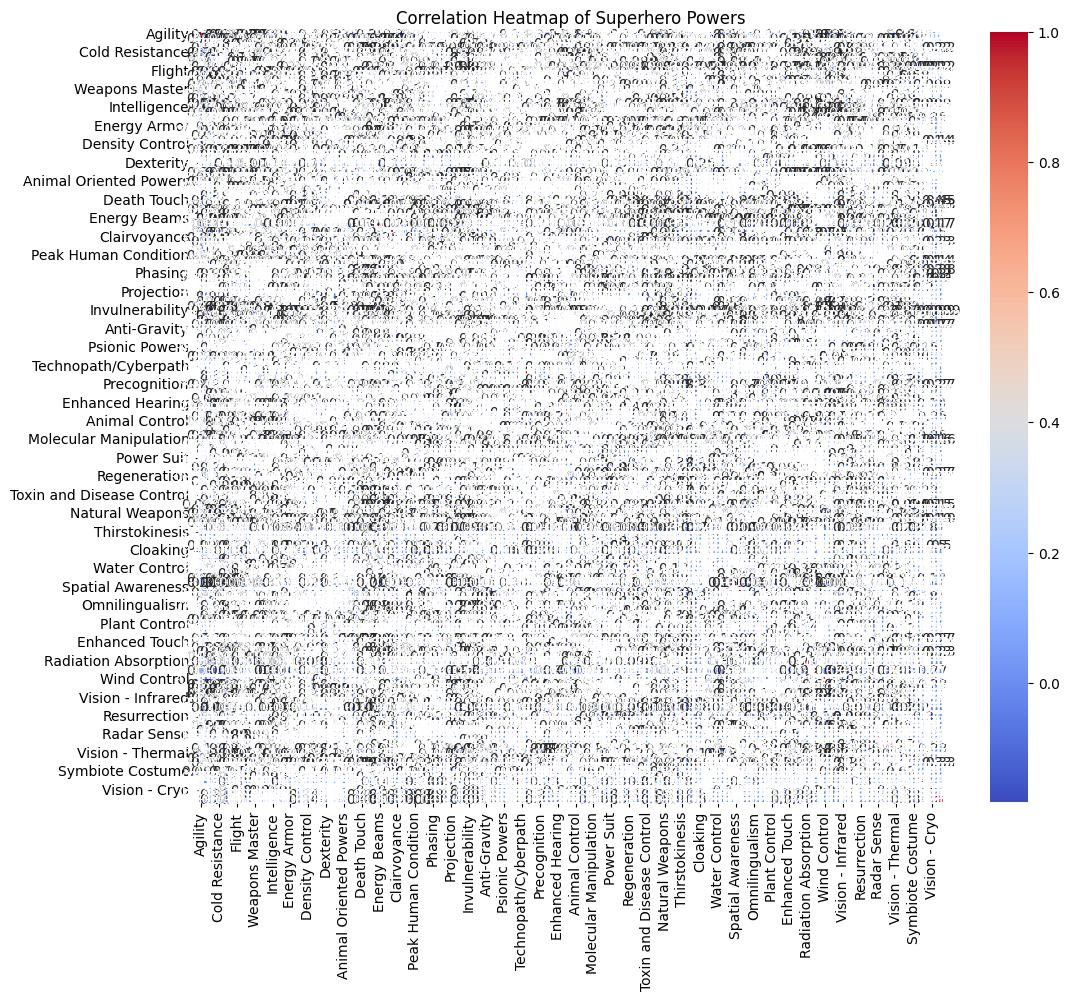

In [482]:
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Superhero Powers")
plt.show()

In [483]:
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)



In [486]:
print(corr_pairs)

Agility     Agility                  1.000000
            Accelerated Healing      0.281213
            Lantern Power Ring      -0.001803
            Dimensional Awareness    0.029233
            Cold Resistance          0.117892
                                       ...   
Omniscient  Phoenix Force           -0.002079
            Molecular Dissipation         NaN
            Vision - Cryo           -0.002079
            Omnipresent              1.000000
            Omniscient               1.000000
Length: 27889, dtype: float64


In [488]:
print(sorted_corr_pairs)

Vision - Heat         Vision - Microscopic    0.713159
Vision - Microscopic  Vision - Heat           0.713159
Vision - X-Ray        Vision - Microscopic    0.710204
Vision - Microscopic  Vision - X-Ray          0.710204
Odin Force            Weather Control         0.705632
                                                ...   
Stealth               Energy Blasts          -0.159813
Flight                Weapons Master         -0.168444
Weapons Master        Flight                 -0.168444
                      Super Strength         -0.182931
Super Strength        Weapons Master         -0.182931
Length: 24802, dtype: float64


In [487]:
# Remove self-correlation (1.0)
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs < 1.0]



In [490]:
# Display the top 10 most correlated powers
print(sorted_corr_pairs.head(10))

Vision - Heat         Vision - Microscopic    0.713159
Vision - Microscopic  Vision - Heat           0.713159
Vision - X-Ray        Vision - Microscopic    0.710204
Vision - Microscopic  Vision - X-Ray          0.710204
Odin Force            Weather Control         0.705632
Weather Control       Odin Force              0.705632
Vision - Heat         Super Breath            0.670812
Super Breath          Vision - Heat           0.670812
Danger Sense          Web Creation            0.664786
Web Creation          Danger Sense            0.664786
dtype: float64


In [491]:
heroes_and_powers_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Reality Warping', 'Odin Force', 'Symbiote Costume', 'Speed Force',
       'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo',
       'Omnipresent', 'Omniscient', 'Power Count'],
      dtype='object', length=178)

In [499]:
# What is the distribution of skin colors amongst alien heroes?

hero_skin_alien = heroes_and_powers_df[heroes_and_powers_df['Race'] == 'Alien'][['Skin color', 'Race']]
hero_skin_alien.head()

,Skin color,Race
39,gold,Alien
100,-,Alien
147,grey,Alien
201,-,Alien
217,green,Alien


In [515]:
hero_skin_alien.shape

(7, 2)

In [507]:
type(hero_skin_alien)

pandas.core.frame.DataFrame

    Color  Count
0       -      3
1    gold      1
2    grey      1
3   green      1
4  silver      1


<Axes: xlabel='Color', ylabel='Count'>

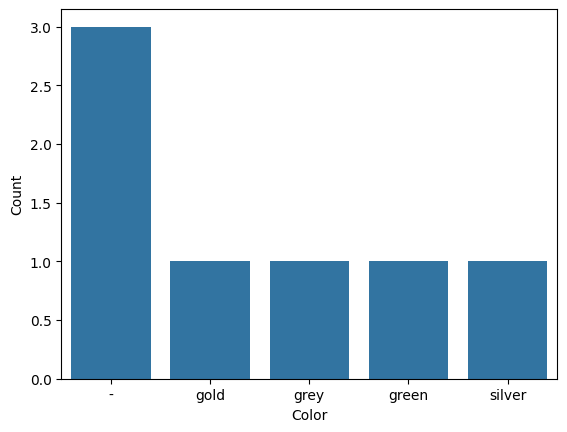

In [513]:
color_value_count = hero_skin_alien['Skin color'].value_counts().reset_index()
color_value_count.columns = ['Color','Count']
print(color_value_count)
# type(color_value_count)

sns.barplot(color_value_count, x= 'Color', y='Count')
